In [64]:
addprocs(4)

4-element Array{Int64,1}:
 6
 7
 8
 9

In [109]:
include("jl/all.jl");

In [110]:
pos = SharedArray(Float32, (3,1))
pos[1,:] = 501
pos[2,:] = 501
pos[3,:] = 501
m = SharedArray(Float32, 1)
m[:] = ones(Float32, 1)
N = 256
rho=SharedArray(Complex64,(N,N,N))
to_rho!(pos,m, rho, 1, 1000);

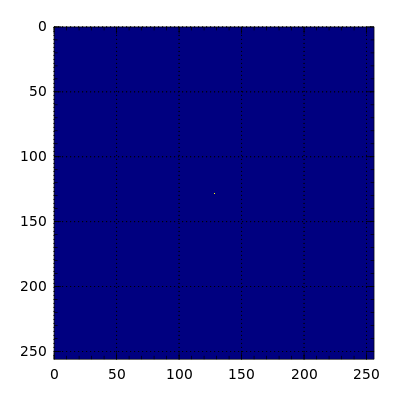

In [111]:
Winston.set_default_plot_size(400,400)
imagesc(real(rho[:,:,129])*100)
grid(true)

In [112]:
@time g = to_g_fft!(rho, 1000, 4.0);

  1.517103 seconds (63.35 k allocations: 2.778 MB)


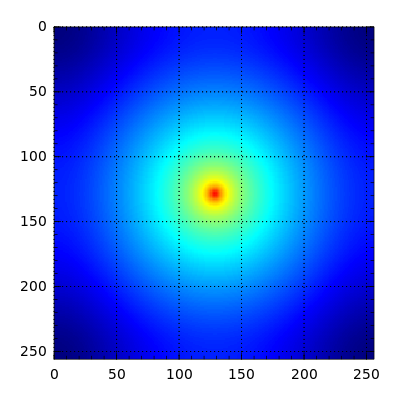

In [113]:
imagesc(log(abs(g[:,:,129])))
grid(true)

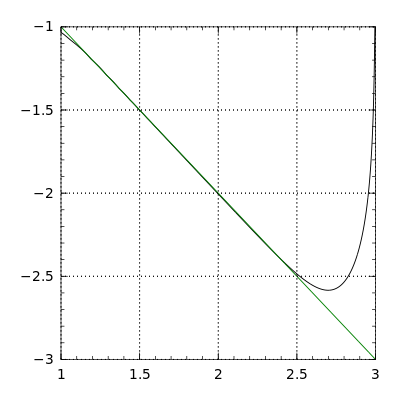

In [114]:
pos = SharedArray(Float32, (3,1000))
pos[1,:] = ones(1000)*501
pos[2,:] = linspace(503.5,1500,1000)
pos[3,:] = ones(1000)*501
v = SharedArray(eltype(g), 1000)
v[:] = 0

hold(false)
#plot(log10(pos[2,:]-501), log10(abs(real(from_cic_dim!(v,pos,g,2,1,1000)))),"k-")
plot(log10(pos[2,:]-501), log10(0.0019+abs(real(from_cic!(v,pos,g,1,1000)))),"k-")
hold(true)

#plot(log10(10:999), -2log10(10:999),"g")
plot(log10(10:999), -log10(10:999),"g")
hold(false)
grid(true)
xlim(1,3)
ylim(-3,-1)

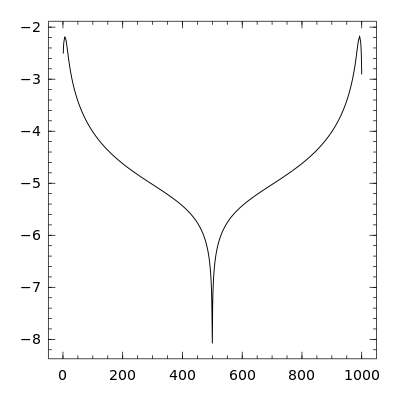

In [115]:
plot(log10(abs(real(from_cic_dim!(v,pos,g,2,1,1000)))),"k-")

In [116]:
from_cic_dim!(v,pos,g,2,1,1000)

1000-element SharedArray{Complex{Float32},1}:
  -0.00310093+1.1516e-10im
 -0.00433819-8.62941e-12im
 -0.00511439-5.96741e-11im
 -0.00557044-6.02134e-11im
 -0.00602649-6.07525e-11im
 -0.00648253-6.12918e-11im
 -0.00646002-4.05538e-11im
 -0.00620618-9.52973e-12im
 -0.00595236+2.14925e-11im
 -0.00569853+5.25147e-11im
 -0.00530252+5.06266e-11im
 -0.00486111+3.82372e-11im
 -0.00441973+2.58486e-11im
                     ⋮    
   0.0055249+1.80825e-10im
   0.0058264+1.07978e-10im
  0.00608024+1.25423e-11im
  0.00633405-8.28845e-11im
   0.00658789-1.7832e-10im
  0.00625279-1.78851e-10im
  0.00579672-1.59895e-10im
   0.00534069-1.4094e-10im
  0.00488461-1.21983e-10im
   0.00371491+6.9684e-12im
  0.00247756+1.46342e-10im
  0.00124036+2.85697e-10im

In [108]:
-SharedArray(Int32, 5)

5-element Array{Int32,1}:
 0
 0
 0
 0
 0